# Linear Discriminant Analysis- Quality 3,4,5,6,7,8

## Import Packages

In [44]:
library(ggplot2)
library(MASS)

## Load and View Packages

In [45]:
wine <- read.csv("WineQT.csv")
head(wine)

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,Id
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>
1,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,0
2,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,1
3,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,2
4,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,3
5,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,4
6,7.4,0.66,0.00,1.8,0.075,13,40,0.9978,3.51,0.56,9.4,5,5


## View Structure of the Dataset

In [46]:
str(wine)

'data.frame':	1143 obs. of  13 variables:
 $ fixed.acidity       : num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ volatile.acidity    : num  0.7 0.88 0.76 0.28 0.7 0.66 0.6 0.65 0.58 0.58 ...
 $ citric.acid         : num  0 0 0.04 0.56 0 0 0.06 0 0.02 0.08 ...
 $ residual.sugar      : num  1.9 2.6 2.3 1.9 1.9 1.8 1.6 1.2 2 1.8 ...
 $ chlorides           : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ free.sulfur.dioxide : num  11 25 15 17 11 13 15 15 9 15 ...
 $ total.sulfur.dioxide: num  34 67 54 60 34 40 59 21 18 65 ...
 $ density             : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH                  : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ sulphates           : num  0.56 0.68 0.65 0.58 0.56 0.56 0.46 0.47 0.57 0.54 ...
 $ alcohol             : num  9.4 9.8 9.8 9.8 9.4 9.4 9.4 10 9.5 9.2 ...
 $ quality             : int  5 5 5 6 5 5 5 7 7 5 ...
 $ Id                  : int  0 1 2 3 4 5 6 7 8 10 ...


## Data Wrangling

### Remove Unnecessary Columns

In [47]:
wine_wrangled <- wine[, c(1,5,8,9,12)]
head(wine_wrangled)

,fixed.acidity,chlorides,density,pH,quality
,<dbl>,<dbl>,<dbl>,<dbl>,<int>
1,7.4,0.076,0.9978,3.51,5
2,7.8,0.098,0.9968,3.20,5
3,7.8,0.092,0.9970,3.26,5
4,11.2,0.075,0.9980,3.16,6
5,7.4,0.076,0.9978,3.51,5
6,7.4,0.075,0.9978,3.51,5


### Convert Quality to a Factor

In [48]:
wine_wrangled$quality = factor(wine_wrangled$quality, levels = c("3", "4", "5", "6", "7", "8"), ordered = TRUE)
str(wine_wrangled)

'data.frame':	1143 obs. of  5 variables:
 $ fixed.acidity: num  7.4 7.8 7.8 11.2 7.4 7.4 7.9 7.3 7.8 6.7 ...
 $ chlorides    : num  0.076 0.098 0.092 0.075 0.076 0.075 0.069 0.065 0.073 0.097 ...
 $ density      : num  0.998 0.997 0.997 0.998 0.998 ...
 $ pH           : num  3.51 3.2 3.26 3.16 3.51 3.51 3.3 3.39 3.36 3.28 ...
 $ quality      : Ord.factor w/ 6 levels "3"<"4"<"5"<"6"<..: 3 3 3 4 3 3 3 5 5 3 ...


## Scale the Data: Scale each predictor value

In [49]:
wine_wrangled[1:4] <- scale(wine_wrangled[1:4])

### Find the Mean of Each Predictor Value:  mean ==0

In [50]:
apply(wine_wrangled[1:4], 2, mean)

fixed.acidity     chlorides       density            pH 
-3.716649e-16 -3.662422e-17  1.039748e-16 -8.347812e-16

### Find Standard Deviation of Each Predictor Variable: standard deviation == 1

In [51]:
apply(wine_wrangled[1:4], 2, sd)

fixed.acidity     chlorides       density            pH 
            1             1             1             1

## Create Training and Test Samples

### Make This Example Reproducible

In [52]:
set.seed(1)

### Use 70% of Dataset as Training Set, Remaining 30% as Testing Set

In [53]:
sample <- sample(c(TRUE, FALSE), nrow(wine_wrangled), replace=TRUE, prob=c(0.7,0.3))
train <- wine_wrangled[sample, ]
test <- wine_wrangled[!sample, ]

## Fit LDA Model

In [54]:
LDAmodel <- lda(quality~., data=train)

In [55]:
LDAmodel

Call:
lda(quality ~ ., data = train)

Prior probabilities of groups:
      3       4       5       6       7       8 
0.00375 0.03500 0.41000 0.40375 0.13875 0.00875 

Group means:
  fixed.acidity   chlorides     density          pH
3   -0.02543178  0.57969628  0.75127534 -0.13413972
4   -0.25568017 -0.17689181 -0.07423699  0.60219472
5   -0.08468859  0.06676452  0.17778146 -0.05006982
6   -0.02194770 -0.02660845 -0.06272600  0.08146231
7    0.36223097 -0.20746900 -0.24422054 -0.17324330
8    0.08356155 -0.41867761 -0.73859231 -0.56271828

Coefficients of linear discriminants:
                      LD1         LD2       LD3         LD4
fixed.acidity  1.67702935 -0.51069961 0.8080964 -0.03623453
chlorides     -0.05788263 -0.27979232 0.5367447 -1.09174849
density       -1.36481363 -0.04227945 0.2660603  0.64170109
pH             0.64463974 -1.35292030 0.3424362 -0.02997925

Proportion of trace:
   LD1    LD2    LD3    LD4 
0.8438 0.1296 0.0198 0.0068 

Prior probabilities of group: These represent the proportions of each Quality rating in the training set.

Group means: These display the mean values for each predictor variable for each species.

Coefficients of linear discriminants: These display the linear combination of predictor variables that are used to form the decision rule of the LDA model. 

## LDA model: Make Predictions on Test Data

In [56]:
predicted <- predict(LDAmodel, test)
names(predicted)

[1] "class"     "posterior" "x"

### View Predicted Class 

In [57]:
predicted$class

[1] 6 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 5 5 5 5 5 5 6 5 6 6 5 5 5 6 3 5 6 5 5
 [38] 5 5 5 5 5 5 5 5 6 5 6 7 5 6 6 5 3 5 6 5 6 5 6 6 6 5 5 5 6 5 7 5 5 5 6 6 6
 [75] 6 5 5 6 6 6 6 6 5 5 6 6 6 5 5 6 6 5 5 6 5 6 5 6 6 6 5 5 6 5 6 6 5 7 6 5 5
[112] 5 6 5 5 6 7 6 6 6 5 5 6 6 5 5 5 5 6 6 5 6 5 6 5 5 5 5 5 6 5 5 5 5 5 6 5 6
[149] 5 5 5 6 5 5 5 5 6 5 5 6 5 5 6 6 5 5 5 5 5 7 5 5 5 5 6 6 5 5 6 5 5 5 6 6 5
[186] 6 6 5 6 5 6 5 6 6 6 6 5 6 6 6 6 6 5 6 6 5 5 6 7 6 7 6 5 6 6 7 6 5 6 6 5 6
[223] 7 5 7 6 5 7 7 7 6 5 6 6 6 6 5 6 6 5 5 6 6 6 6 6 5 5 6 6 6 6 6 6 6 5 5 6 5
[260] 6 5 6 6 6 6 5 5 5 5 6 5 6 6 6 5 5 6 6 5 6 6 6 6 5 6 5 6 7 6 5 6 6 5 6 6 6
[297] 7 6 5 5 6 5 5 6 6 5 5 5 5 6 5 5 5 5 6 6 5 5 6 5 5 6 6 6 6 6 5 5 6 5 5 5 6
[334] 5 6 5 6 6 5 6 6 5 6
Levels: 3 4 5 6 7 8

### View Predicted Posterior Probability

In [17]:
predicted$posterior

,3,4,5,6,7,8
4,0.002624255,0.013016567,0.2191678,0.4469497,0.292228279,0.0260134027
6,0.011336443,0.054541319,0.5058896,0.3977348,0.029460025,0.0010377850
7,0.002771400,0.021149734,0.4769558,0.4139241,0.077603325,0.0075955948
15,0.014470263,0.060881289,0.5023064,0.3948704,0.026668511,0.0008032113
17,0.001968819,0.013355974,0.5493939,0.3584183,0.067849671,0.0090133328
18,0.006003149,0.037875591,0.5583481,0.3660139,0.030035460,0.0017237931
20,0.002541010,0.019983025,0.5240960,0.3844762,0.062205645,0.0066981226
21,0.008013234,0.045386856,0.5296811,0.3848399,0.030668682,0.0014102053
29,0.003977256,0.020262584,0.7042125,0.2561801,0.014348335,0.0010192141
35,0.001802226,0.011648026,0.5560862,0.3515952,0.069324127,0.0095441710


### View Linear Discriminants 

In [58]:
predicted$x

,LD1,LD2,LD3,LD4
4,1.27454103,0.50197020,1.054345687,0.64144781
6,-0.79004934,-1.40569527,0.034595335,0.58659282
7,-0.17444005,0.32797261,-0.454844762,0.28831993
15,-0.84913699,-1.60071986,0.283706188,0.55218708
17,-0.43554647,1.17771390,-0.235939771,0.08763252
18,-0.90231962,-0.60594688,-0.396124231,0.04795588
20,-0.41629874,0.52763727,-0.540013251,-0.02237105
21,-0.82326861,-0.98901332,-0.217705522,0.28497709
29,-1.62544913,0.18389201,-0.416444498,0.64620835
35,-0.43040090,1.31536583,-0.213026905,0.41621454


## Accuracy of the Model

In [65]:
mean(predicted$class==test$quality)

Warning message in mean(predicted$class == test$quality):
“Incompatible methods ("Ops.factor", "Ops.ordered") for "=="”


ERROR: Error in predicted$class == test$quality: comparison of these types is not implemented


## Visualize the Results

### Define the Data to Plot

In [63]:
lda_plot <- cbind(train, predict(LDAmodel)$x)

### Create Plot

Warning message:
“Duplicated aesthetics after name standardisation: ”


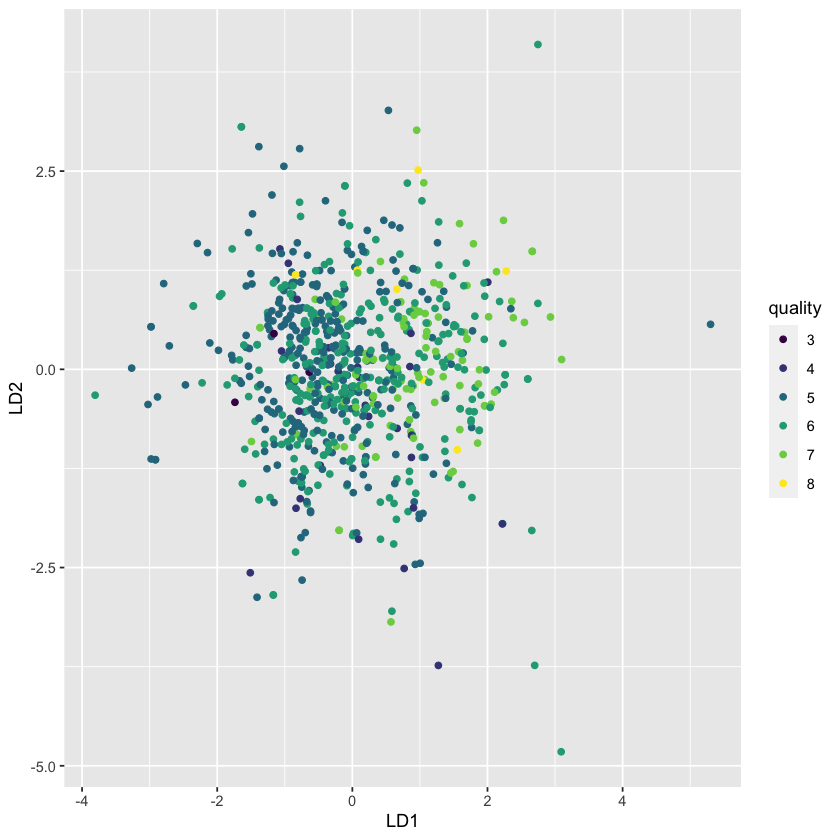

In [64]:
ggplot(lda_plot, aes(LD1, LD2, LD3, LD4)) +
  geom_point(aes(color = quality))